In [1]:
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from pprint import pprint
import gzip
from collections import defaultdict
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from math import sqrt, exp, log
from collections import defaultdict
from sklearn.linear_model import LogisticRegression
%matplotlib inline
np.random.seed(0)

/Users/waquarahmad/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
data = pd.read_csv('train.csv',header=0)
print('Train Data Loaded...')
members = pd.read_csv('members.csv',header=0)
print('Members Data Loaded...')
songs = pd.read_csv('songs.csv',header=0)
print('Songs Data Loaded...')
# #songsx = pd.read_csv('D:\\study\\UCSD\\Fall 17\\258\\Assignment2\\Data\\song_extra_info.csv',header=0)
# print('Songs Extra Info Loaded...')
# test_data = pd.read_csv('D:\\study\\UCSD\\Fall 17\\258\\Assignment2\\Data\\test.csv',header=0)
# print('Test Data Loaded...')

Train Data Loaded...
Members Data Loaded...
Songs Data Loaded...


In [44]:
print(len(data))

7377418


In [4]:
genre_list = defaultdict(int)
song_genre_list = dict(defaultdict(int))
artist_list = defaultdict(int)
language_list = defaultdict(int)
composer_list = defaultdict(int)
song_artist_list = defaultdict(str)
song_language_list = defaultdict(str)
song_composer_list = defaultdict(str)

for i in range(len(songs)):
    s = songs['song_id'][i]
    if s not in song_genre_list:
        song_genre_list[s] = defaultdict(int)
    if  not pd.isnull(songs.loc[i,'genre_ids']):
        genlist = songs['genre_ids'][i].split('|')
        #print(genlist)
        for j in range(len(genlist)):
            song_genre_list[s][genlist[j]] = 1
            genre_list[genlist[j]] += 1
    song_artist_list[s] = songs['artist_name'][i]
    artist_list[songs['artist_name'][i]] += 1
    if not pd.isnull(songs.loc[i,'language']) and songs['language'][i] != -1:
        song_language_list[s] = songs['language'][i]
        language_list[songs['language'][i]] += 1
    if  not pd.isnull(songs.loc[i,'composer']):
        song_composer_list[s] = songs['composer'][i]
        composer_list[songs['composer'][i]] += 1
    
    if i%100000 == 0 or i == len(songs)-1:
        print(i)

0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
1900000
2000000
2100000
2200000
2296319


In [5]:
gender_list = defaultdict(int)
gender_null_count = 0
city_list = defaultdict(int)
bd_list = defaultdict(int)
user_gender_list = defaultdict(str)
user_city_list = defaultdict(int)
user_bd_list = defaultdict(int)

for i in range(len(members)):
    u = members['msno'][i]
    
    if not pd.isnull(members.loc[i,'gender']):
        user_gender_list[u] = members['gender'][i]
        gender_list[members['gender'][i]] += 1
    else:
        gender_null_count += 1
    
    user_city_list[u] = members['city'][i]
    city_list[members['city'][i]] += 1
    
    if members['bd'][i] != 0:
        user_bd_list[u] = members['bd'][i]
        bd_list[members['bd'][i]] += 1

In [6]:
### Data Sampling
from random import randrange, uniform
random_songs=set()
while(len(random_songs)<1000000):
    x=randrange(0,len(songs))
    random_songs.add(songs['song_id'][x])

random_users=set()
while(len(random_users)<10000):
    x=randrange(0,len(members))
    u = members['msno'][x]
    if u in user_bd_list and u in user_gender_list:
        random_users.add(u)
print(len(random_users))
X_sample=[]
Y_sample=[]
for i in range(len(data)):
    if data['msno'][i] in random_users and data['song_id'][i] in random_songs:
        given_user=data['msno'][i]
        X_sample.append((data['msno'][i], data['song_id'][i]))
        Y_sample.append(data['target'][i])    
print(len(X_sample))

10000
1307449


In [7]:
# Random Samples
from random import randrange, uniform
#from sets import Set
X_samplep = []
X_samplen = []
Y_samplep = []
Y_samplen = []
N = 250000
for i in range(len(X_sample)):
    if Y_sample[i] == 0:
        X_samplen.append(X_sample[i])
        Y_samplen.append(Y_sample[i])
    else:
        X_samplep.append(X_sample[i])
        Y_samplep.append(Y_sample[i])
X = X_samplen[:int(N*0.6)] + X_samplep[:int(N*0.6)]
Y = Y_samplen[:int(N*0.6)] + Y_samplep[:int(N*0.6)]
X_valid = X_samplen[int(N*0.6):int(N*0.8)] + X_samplep[int(N*0.6):int(N*0.8)]
Y_valid = Y_samplen[int(N*0.6):int(N*0.8)] + Y_samplep[int(N*0.6):int(N*0.8)]
X_test = X_samplen[int(N*0.8):N] + X_samplep[int(N*0.8):N]
Y_test = Y_samplen[int(N*0.8):N] + Y_samplep[int(N*0.8):N]
X_orig = X_samplen[:] + X_samplep[:]
Y_orig = Y_samplen[:] + Y_samplep[:]

In [8]:
# Data Stats
from collections import defaultdict
dd = defaultdict(int)
ss = defaultdict(int)
for i in range(len(X)):
    dd[X[i][0]]+=1
    ss[X[i][1]]+=1
avg = 0
for u in dd:
    avg += dd[u]
avg = avg * 1.0 / len(dd)
print('num_users: ', len(dd))
print('num_songs: ', len(ss))
print(avg)
print(sum(Y))
print(len(X))

num_users:  7271
num_songs:  43753
41.259799202310546
150000
300000


In [9]:
## User User Similarity based on song

song_list = defaultdict(set)
user_list=dict(defaultdict(str))

for d in range(len(X)):
    user = X[d][0]
    song = X[d][1]
    if Y[d]==1:
        song_list[song].add(user)

for i in song_list:
    s=song_list[i]
    for u1 in s:
        for u2 in s:
            if u1!=u2:
                if u1 in user_list:
                    if u2 in user_list[u1]:
                        user_list[u1][u2] +=1
                    else:
                        user_list[u1][u2]=1
                else:
                    user_list[u1]=defaultdict(str)
                    user_list[u1][u2]=1
                    

In [10]:
## Song Song Similarity based on users
users_songlist=defaultdict(set)
songs_songs_list=dict(defaultdict(str))

for d in range(len(X)):
    user = X[d][0]
    song = X[d][1]
    if Y[d]==1:
        users_songlist[user].add(song)

for i in users_songlist:
    u=users_songlist[i]
    for s1 in u:
        for s2 in u:
            if s1!=s2:
                if s1 in songs_songs_list:
                    if s2 in songs_songs_list[s1]:
                        songs_songs_list[s1][s2] +=1
                    else:
                        songs_songs_list[s1][s2]=1
                else:
                    songs_songs_list[s1]=defaultdict(str)
                    songs_songs_list[s1][s2]=1




In [11]:
## User Genre Dict
user_genre_list = defaultdict(set)
for x in range(len(X)):
    u = X[x][0]
    s = X[x][1]
    if s in song_genre_list:
        for g in song_genre_list[s]:
            user_genre_list[u].add(g)

In [39]:
#Generate Threshhold Dictionaries
gender_genre_list = dict(defaultdict(int))
gender_artist_list = dict(defaultdict(int))
gender_composer_list = dict(defaultdict(int))
bd_genre_list = dict(defaultdict(int))
bd_artist_list = dict(defaultdict(int))
city_genre_list = dict(defaultdict(int))
city_language_list = dict(defaultdict(int))
city_artist_list = dict(defaultdict(int))

for i in range(len(X)):
    u = X[i][0]
    s = X[i][1]
    if Y[i] == 1:
    #print u,s
        if u in user_gender_list:
    #         print('Hi')
            if user_gender_list[u] not in gender_genre_list:
    #             print('Hi')
                gender_genre_list[user_gender_list[u]] = defaultdict(int)
            if s in song_genre_list:
                for j in song_genre_list[s]:
                    gender_genre_list[user_gender_list[u]][j] += 1
            if user_gender_list[u] not in gender_composer_list:
                gender_composer_list[user_gender_list[u]] = defaultdict(int)
            if s in song_composer_list:
                gender_composer_list[user_gender_list[u]][song_composer_list[s]] += 1
            if user_gender_list[u] not in gender_artist_list:
                gender_artist_list[user_gender_list[u]] = defaultdict(int)
            gender_artist_list[user_gender_list[u]][song_artist_list[s]] += 1

        if u in user_bd_list:
            if user_bd_list[u] not in bd_genre_list:
                bd_genre_list[user_bd_list[u]] = defaultdict(int)
            if s in song_genre_list:
                for j in song_genre_list[s]:
                    bd_genre_list[user_bd_list[u]][j] += 1
            if user_bd_list[u] not in bd_artist_list:
                bd_artist_list[user_bd_list[u]] = defaultdict(int)
            bd_artist_list[user_bd_list[u]][song_artist_list[s]] += 1

        if user_city_list[u] not in city_genre_list:
            city_genre_list[user_city_list[u]] = defaultdict(int)
        if s in song_genre_list:
            for j in song_genre_list[s]:
                city_genre_list[user_city_list[u]][j] += 1
        if user_city_list[u] not in city_language_list:
            city_language_list[user_city_list[u]] = defaultdict(int)
        city_language_list[user_city_list[u]][song_language_list[s]] += 1
        if user_city_list[u] not in city_artist_list:
            city_artist_list[user_city_list[u]] = defaultdict(int)
        city_artist_list[user_city_list[u]][song_artist_list[s]] += 1


In [13]:
#Generate User Artist similarity

artist_userlist=defaultdict(set)
sim_users_art=dict(defaultdict(str))

for d in range(len(X)):
    user = X[d][0]
    song = X[d][1]
    if Y[d]==1:
        artist= song_artist_list[song]
        artist_userlist[artist].add(user)

for i in artist_userlist:
    a=artist_userlist[i]
    for u1 in a:
        for u2 in a:
            if u1!=u2:
                if u1 in sim_users_art:
                    if u2 in sim_users_art[u1]:
                        sim_users_art[u1][u2] +=1
                    else:
                        sim_users_art[u1][u2]=1
                else:
                    sim_users_art[u1]=defaultdict(str)
                    sim_users_art[u1][u2]=1

In [14]:
# User Language Similarity
language_userlist=defaultdict(set)
sim_users_lang=dict(defaultdict(str))

for d in range(len(X)):
    user = X[d][0]
    song = X[d][1]
    lang= song_language_list[song]
    if Y[d]==1:
        language_userlist[lang].add(user)



# for i in language_userlist:
#     l=language_userlist[i]
#     for u1 in l:
#         for u2 in l:
#             if u1!=u2:
#                 if u1 in sim_users_lang:
#                     if u2 in sim_users_lang[u1]:
#                         sim_users_lang[u1][u2] +=1
#                     else:
#                         sim_users_lang[u1][u2]=1
#                 else:
#                     sim_users_lang[u1]=defaultdict(str)
#                     sim_users_lang[u1][u2]=1

In [15]:
#User Genre Similarity 

genre_userlist=defaultdict(set)
sim_users_genre=dict(defaultdict(str))

for d in range(len(X)):
    user = X[d][0]
    song = X[d][1]
    if Y[d]==1:
        if song in song_genre_list:
            genres= song_genre_list[song]
            for g in genres:
                    genre_userlist[g].add(user)
    

# for i in genre_userlist:
#     g=genre_userlist[i]
#     for u1 in g:
#         for u2 in g:
#             if u1!=u2:
#                 if u1 in sim_users_genre:
#                     if u2 in sim_users_genre[u1]:
#                         sim_users_genre[u1][u2] +=1
#                     else:
#                         sim_users_genre[u1][u2]=1
#                 else:
#                     sim_users_genre[u1]=defaultdict(str)
#                     sim_users_genre[u1][u2]=1    



            

# print(len(sim_users_genre))

In [40]:
gender_genre_sorted = defaultdict(list)
gender_artist_sorted = defaultdict(list)
gender_composer_sorted = defaultdict(list)
bd_genre_sorted = defaultdict(list)
bd_artist_sorted = defaultdict(list)
city_genre_sorted = defaultdict(list)
city_language_sorted = defaultdict(list)
city_artist_sorted = defaultdict(list)

for g in gender_genre_list:
    gender_genre_sorted[g] = sorted(gender_genre_list[g].items(), key=lambda x:x[1], reverse=True)
for g in gender_artist_list:
    gender_artist_sorted[g] = sorted(gender_artist_list[g].items(), key=lambda x:x[1], reverse=True)
for g in gender_composer_list:
    gender_composer_sorted[g] = sorted(gender_composer_list[g].items(), key=lambda x:x[1], reverse=True)
for b in bd_genre_list:
    bd_genre_sorted[b] = sorted(bd_genre_list[b].items(), key=lambda x:x[1], reverse=True)
for b in bd_artist_list:
    bd_artist_sorted[b] = sorted(bd_artist_list[b].items(), key=lambda x:x[1], reverse=True)
for c in city_genre_list:
    city_genre_sorted[c] = sorted(city_genre_list[c].items(), key=lambda x:x[1], reverse=True)
for c in city_language_list:
    city_language_sorted[c] = sorted(city_language_list[c].items(), key=lambda x:x[1], reverse=True)
for c in city_artist_list:
    city_artist_sorted[c] = sorted(city_artist_list[c].items(), key=lambda x:x[1], reverse=True)

In [41]:
bd_bucket = [0,15,30,45]
bd_bucket_genre_list = dict(defaultdict(int))
bd_bucket_artist_list = dict(defaultdict(int))
bd_genre_sorted = defaultdict(list)
bd_artist_sorted = defaultdict(list)
for b in bd_genre_list:
    if b <= bd_bucket[1]:
        buck = 0
    elif b <= bd_bucket[2]:
        buck = 1
    elif b <= bd_bucket[3]:
        buck = 2
    else:
        buck = 3
    if buck not in bd_bucket_genre_list:
        bd_bucket_genre_list[buck] = defaultdict(int)
    for i in bd_genre_list[b]:
        bd_bucket_genre_list[buck][i] += bd_genre_list[b][i]

for b in bd_artist_list:
    if b <= bd_bucket[1]:
        buck = 0
    elif b <= bd_bucket[2]:
        buck = 1
    elif b <= bd_bucket[3]:
        buck = 2
    else:
        buck = 3
    if buck not in bd_bucket_artist_list:
        bd_bucket_artist_list[buck] = defaultdict(int)
    for i in bd_artist_list[b]:
        bd_bucket_artist_list[buck][i] += bd_artist_list[b][i]

for b in bd_bucket_genre_list:
    bd_genre_sorted[b] = sorted(bd_bucket_genre_list[b].items(), key=lambda x:x[1], reverse=True)
for b in bd_bucket_artist_list:
    bd_artist_sorted[b] = sorted(bd_bucket_artist_list[b].items(), key=lambda x:x[1], reverse=True)

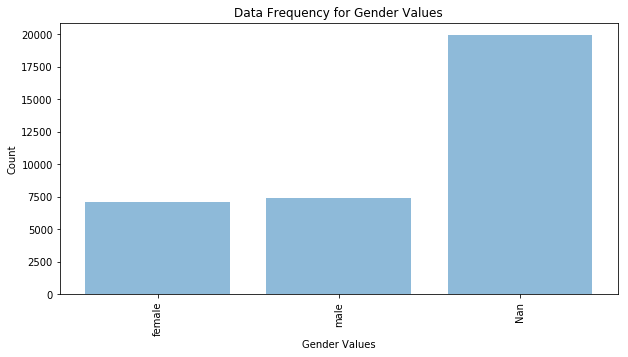

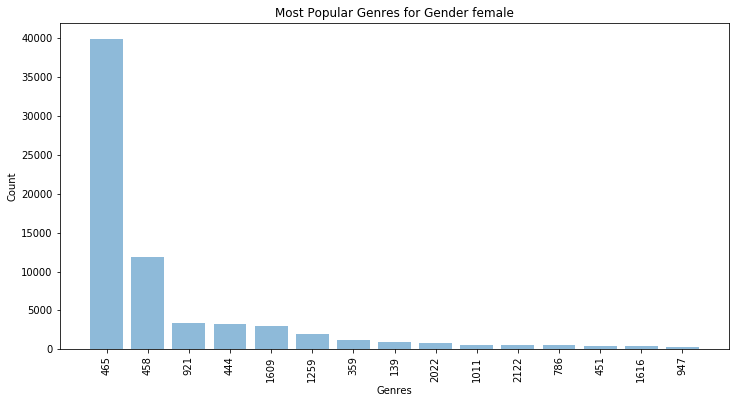

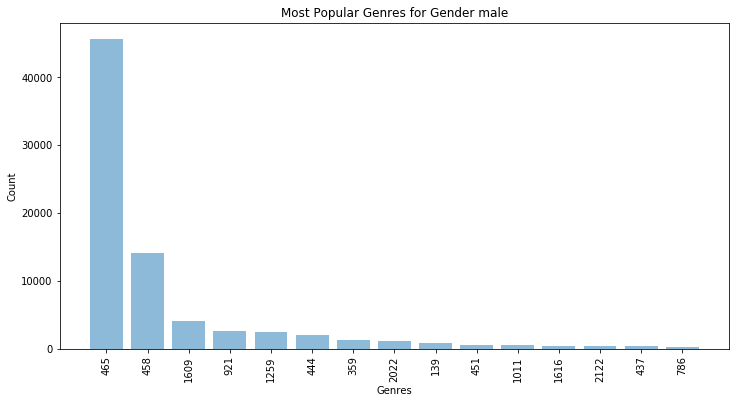

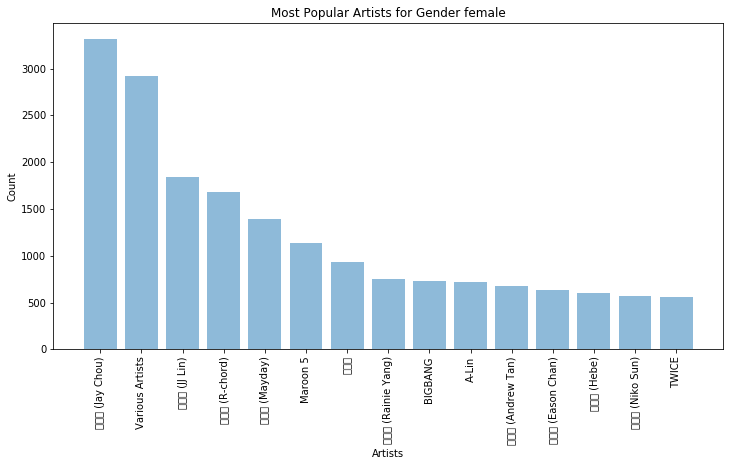

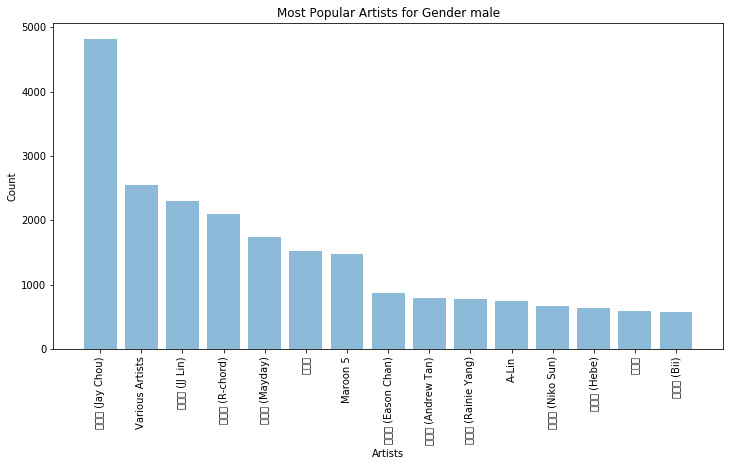

In [42]:
val_print = 15
################ Gender Based Plots #####################
## Gender Count
x = []
y = []
for g in gender_list:
    x.append(g)
    y.append(gender_list[g])
x.append('Nan')
y.append(gender_null_count)
x_ = np.arange(len(x))
plt.figure(figsize=(10,5))
plt.bar(x_,y,align='center',alpha=0.5)
plt.xticks(x_,x,rotation='vertical')
#plt.margins(0.2)
#plt.subplots_adjust(bottom=0.15)
plt.xlabel('Gender Values')
plt.ylabel('Count')
plt.title('Data Frequency for Gender Values')
plt.show()

## Gender-Genre
for g in gender_genre_sorted:
    x = []
    y = []
    for ge in gender_genre_sorted[g]:
        x.append(ge[0])
        y.append(ge[1])
        if len(x) >= val_print:
            break
    x_ = np.arange(len(x))
    plt.figure(figsize=(12,6))
    plt.bar(x_,y,align='center',alpha=0.5)
    plt.xticks(x_,x,rotation='vertical')
    #plt.margins(0.2)
    #plt.subplots_adjust(bottom=0.15)
    plt.xlabel('Genres')
    plt.ylabel('Count')
    plt.title('Most Popular Genres for Gender %s' %g)
    plt.show()

## Gender-Artist
for g in gender_artist_sorted:
    x = []
    y = []
    for ar in gender_artist_sorted[g]:
        x.append(ar[0])
        y.append(ar[1])
        if len(x) >= val_print:
            break
    x_ = np.arange(len(x))
    plt.figure(figsize=(12,6))
    plt.bar(x_,y,align='center',alpha=0.5)
    plt.xticks(x_,x,rotation='vertical')
    #plt.margins(0.2)
    #plt.subplots_adjust(bottom=0.15)
    plt.xlabel('Artists')
    plt.ylabel('Count')
    plt.title('Most Popular Artists for Gender %s' %g)
    plt.show()

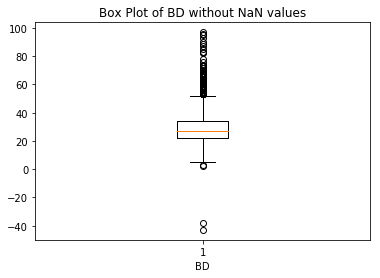

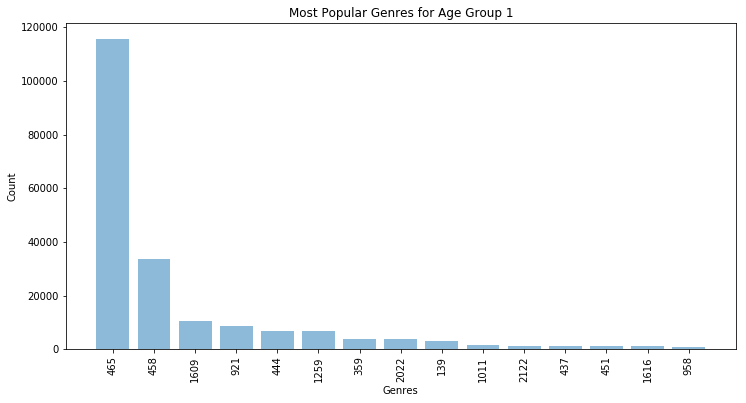

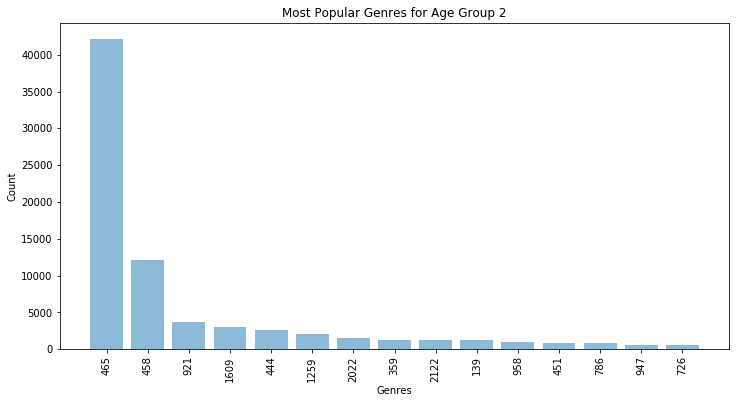

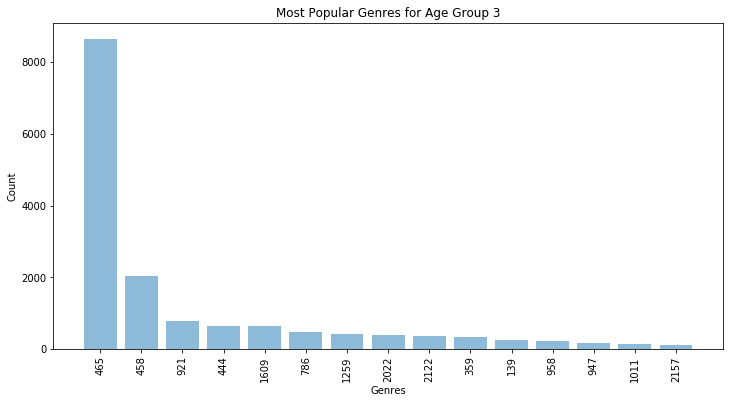

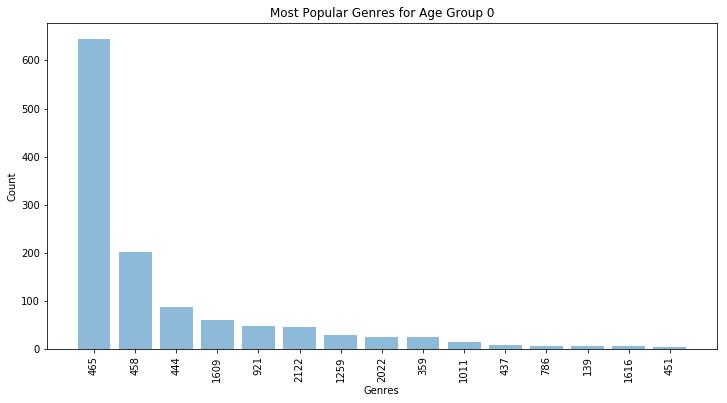

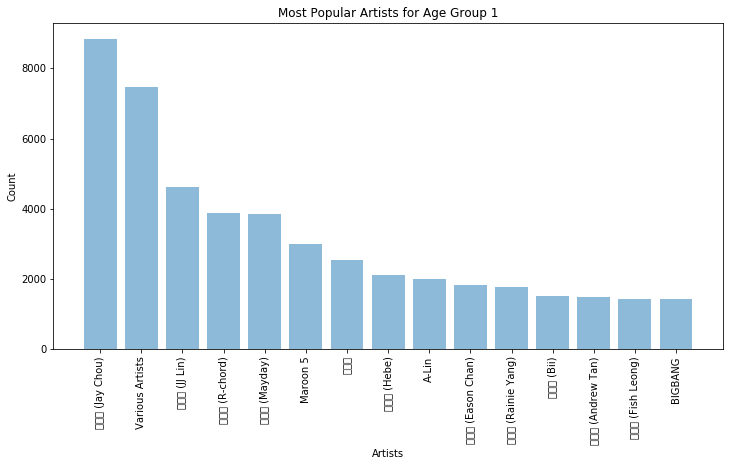

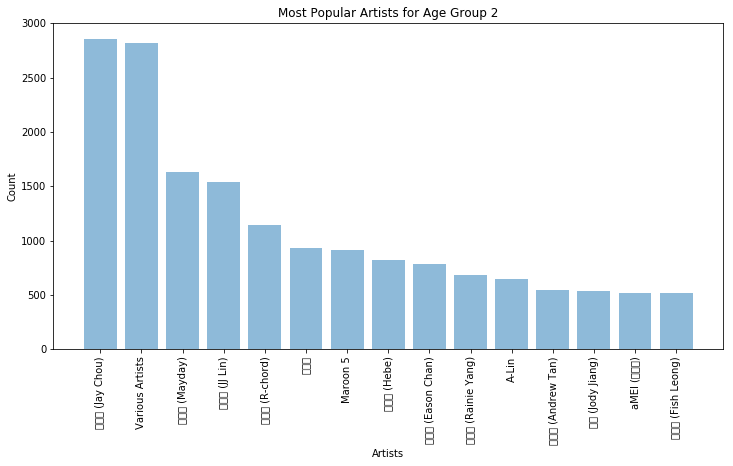

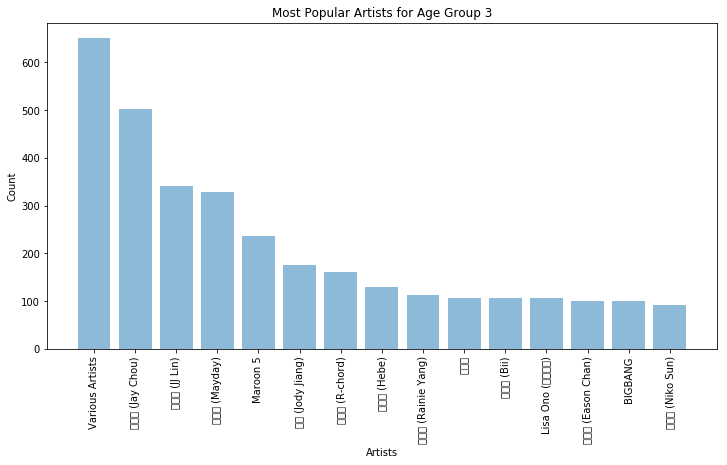

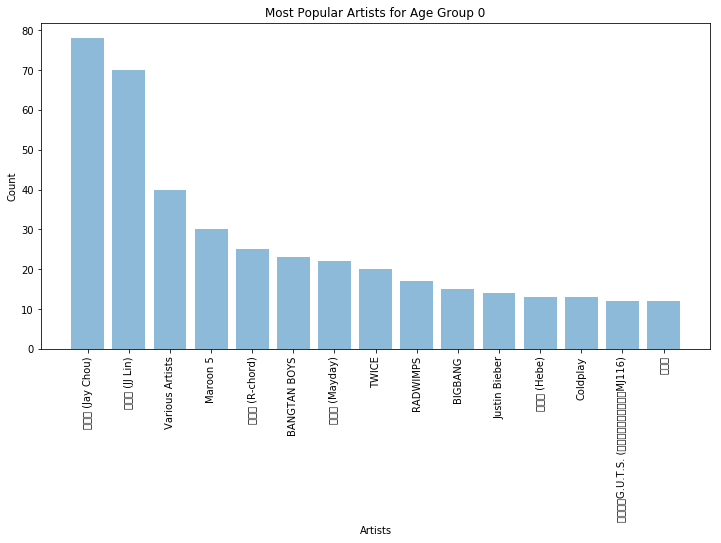

In [20]:
################ Age Based Plots #####################
## BD Box Plot
x = []
for b in bd_list:
    if b <= 100:
        for i in range(bd_list[b]):
            x.append(b)
plt.figure()
plt.boxplot(x)
plt.xlabel('BD')
plt.title('Box Plot of BD without NaN values')
plt.show()

## BD-Genre
for b in bd_genre_sorted:
    x = []
    y = []
    for ge in bd_genre_sorted[b]:
        x.append(ge[0])
        y.append(ge[1])
        if len(x) >= val_print:
            break
    x_ = np.arange(len(x))
    plt.figure(figsize=(12,6))
    plt.bar(x_,y,align='center',alpha=0.5)
    plt.xticks(x_,x,rotation='vertical')
#     plt.margins(0.2)
#     plt.subplots_adjust(bottom=0.15)
    plt.xlabel('Genres')
    plt.ylabel('Count')
    plt.title('Most Popular Genres for Age Group %d' %b)
    plt.show()

## BD-Artist
for b in bd_artist_sorted:
    x = []
    y = []
    for ar in bd_artist_sorted[b]:
        x.append(ar[0])
        y.append(ar[1])
        if len(x) >= val_print:
            break
    x_ = np.arange(len(x))
    plt.figure(figsize=(12,6))
    plt.bar(x_,y,align='center',alpha=0.5)
    plt.xticks(x_,x,rotation='vertical')
#     plt.margins(0.2)
#     plt.subplots_adjust(bottom=0.15)
    plt.xlabel('Artists')
    plt.ylabel('Count')
    plt.title('Most Popular Artists for Age Group %d' %b)
    plt.show()

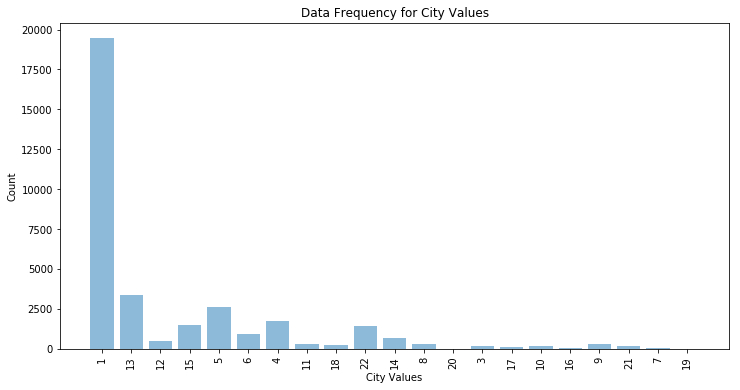

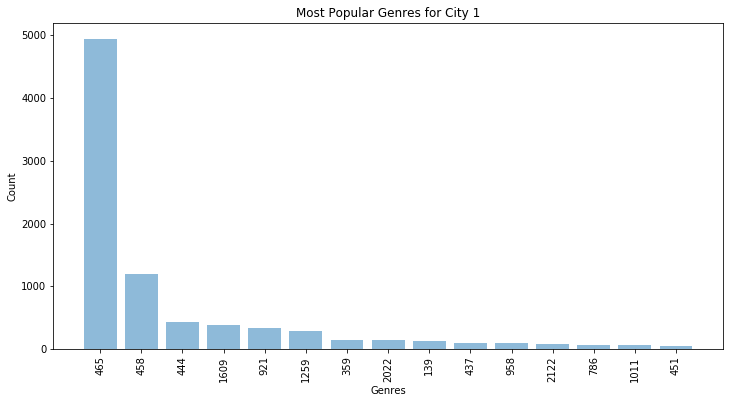

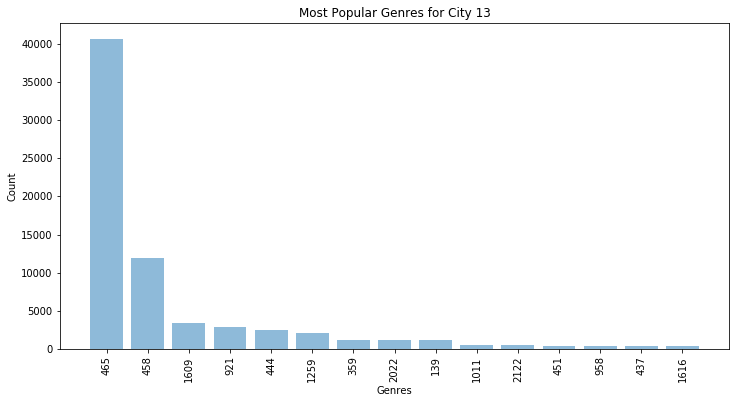

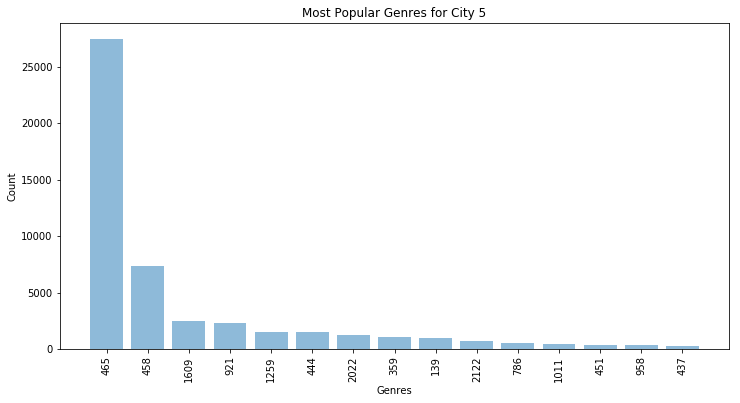

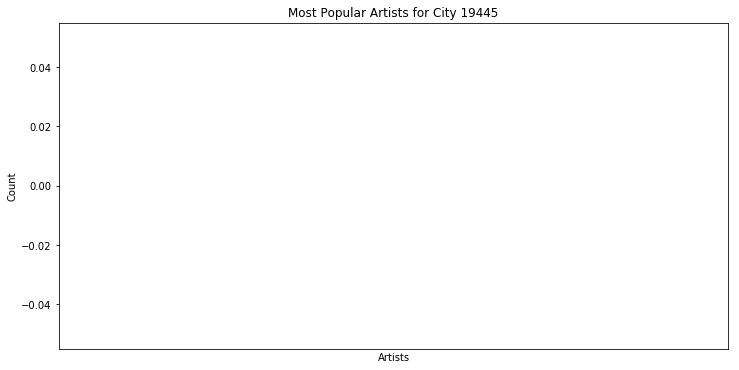

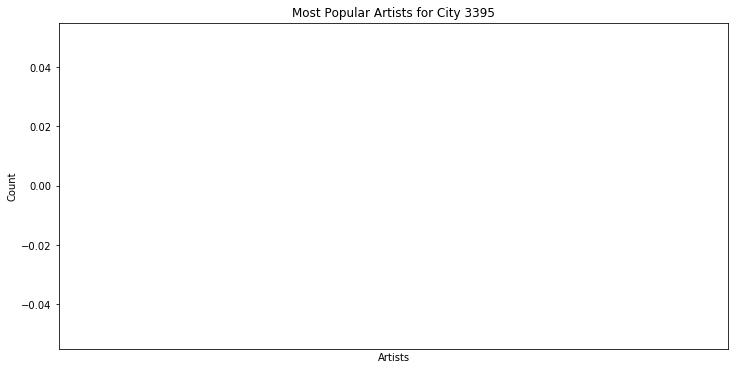

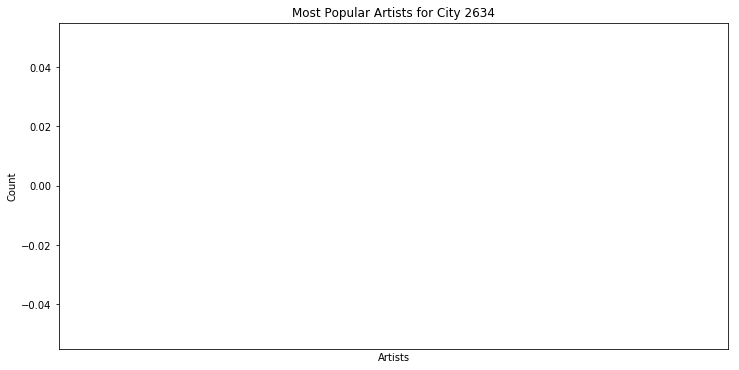

In [23]:
################ City Based Plots #####################
## City Count
x = []
y = []
for c in city_list:
    x.append(c)
    y.append(city_list[c])
x_ = np.arange(len(x))
plt.figure(figsize=(12,6))
plt.bar(x_,y,align='center',alpha=0.5)
plt.xticks(x_,x,rotation='vertical')
# plt.margins(0.2)
# plt.subplots_adjust(bottom=0.15)
plt.xlabel('City Values')
plt.ylabel('Count')
plt.title('Data Frequency for City Values')
plt.show()

city_sorted = sorted(city_list.items(), key=lambda x:x[1], reverse=True)
## City-Genre
for i in range(3):
    c = city_sorted[i][0]
    x = []
    y = []
    for ge in city_genre_sorted[c]:
        x.append(ge[0])
        y.append(ge[1])
        if len(x) >= val_print:
            break
    x_ = np.arange(len(x))
    plt.figure(figsize=(12,6))
    plt.bar(x_,y,align='center',alpha=0.5)
    plt.xticks(x_,x,rotation='vertical')
#     plt.margins(0.2)
#     plt.subplots_adjust(bottom=0.15)
    plt.xlabel('Genres')
    plt.ylabel('Count')
    plt.title('Most Popular Genres for City %d' %c)
    plt.show()

## BD-Artist
for i in range(3):
    c = city_sorted[i][1]
    x = []
    y = []
    for ar in city_artist_sorted[c]:
        x.append(ar[0])
        y.append(ar[1])
        if len(x) >= val_print:
            break
    x_ = np.arange(len(x))
    plt.figure(figsize=(12,6))
    plt.bar(x_,y,align='center',alpha=0.5)
    plt.xticks(x_,x,rotation='vertical')
#     plt.margins(0.2)
#     plt.subplots_adjust(bottom=0.15)
    plt.xlabel('Artists')
    plt.ylabel('Count')
    plt.title('Most Popular Artists for City %d' %c)
    plt.show()

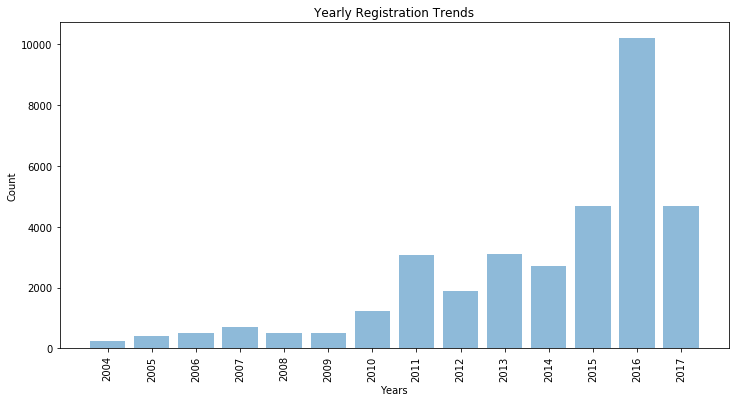

In [38]:
############## Temporal Information ################
reg_year = defaultdict(int)
for i in range(len(members)):
    if not pd.isnull(members.loc[i,'registration_init_time']):
        y = members['registration_init_time'][i]
        y = int(y/10000)
        #print(y)
        reg_year[y] += 1
reg_year = sorted(reg_year.items(), key=lambda x:x[0])
x = []
y = []
for r in reg_year:
    x.append(r[0])
    y.append(r[1])
x_ = np.arange(len(x))
plt.figure(figsize=(12,6))
plt.bar(x_,y,align='center',alpha=0.5)
plt.xticks(x_,x,rotation='vertical')
# plt.margins(0.2)
# plt.subplots_adjust(bottom=0.15)
plt.xlabel('Years')
plt.ylabel('Count')
plt.title('Yearly Registration Trends')
plt.show()

In [51]:
for i in city_list:
    print(i,city_list[i])
    
print(city_list[1]/len(members))

1 19445
13 3395
12 491
15 1525
5 2634
6 913
4 1732
11 285
18 259
22 1467
14 708
8 289
20 27
3 204
17 152
10 216
16 35
9 309
21 213
7 93
19 11
0.5652123361334768
